## CIENCIA DE DATOS EN PYTHON
### PROYECTO FINAL

### Presenta: Margerys Salgado

### Carnet No.21006394

### Estimacion de Modelo

Crear modelos predictivos de regresion lineal uni-variable sencillos.  
Los datos del proyecto pertenecen al ejemplo clasico y muy conocido al iniciar a estudiar ciencia de datos: prediccion de precios de casas.

#### Variables

-- SalePrice = el precio de venta de la propiedad en dolares. Variable objetivo que se necesita predecir.  

-- OverallQual =  calidada de materiales y acabados. Califica el material general y el acabado de la casa.  
10 = Very Excellent;  9 = Excellent;  8 = Very Good;  7 = Good;  6 = Above Average;  5 = Average;  4 = Below Average;  3 = Fair;  2 = Poor;  1 = Very Poor  

-- FlrSF1st = pies cuadrados del primer piso.  

-- TotRmsAbvGrd = total habitaciones (no incluye banos).  

-- YearBuilt = anio de construccion.  

-- LotFrontage: pies lineales de calle, conectada a la propiedad.

#### Inciso No.1  
Exploracion de los datos

#### Librerias

In [20]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as seabornInstance

from sklearn.model_selection import train_test_split
from sklearn import linear_model

#### Carga de data

In [21]:
import numpy as np
data_proy = np.load('proyecto_training_data.npy')

In [22]:
print('Dimension de la Data:', data_proy.shape)
print('Rango de los Datos:', data_proy.ndim)
print('Tipo de Datos:', type(data_proy))

Dimension de la Data: (1460, 6)
Rango de los Datos: 2
Tipo de Datos: <class 'numpy.ndarray'>


#### Revision de la Data

#####  * Nombrar Variables

In [23]:
data_proy = pd.DataFrame(data_proy, columns=['SalePrice', 'OverallQual', 'FlrSF1st', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])

##### * Reordenar variables

In [24]:
data_proy = data_proy[['SalePrice', 'YearBuilt', 'OverallQual', 'FlrSF1st', 'TotRmsAbvGrd', 'LotFrontage']]

##### * Revisiones valores NaN

In [25]:
data_proy.isnull().any()

SalePrice       False
YearBuilt       False
OverallQual     False
FlrSF1st        False
TotRmsAbvGrd    False
LotFrontage      True
dtype: bool

##### * Eliminar Valores NaN

In [26]:
data_proy = data_proy.fillna(method='ffill')
data_proy

,SalePrice,YearBuilt,OverallQual,FlrSF1st,TotRmsAbvGrd,LotFrontage
0,208500.0,2003.0,7.0,856.0,8.0,65.0
1,181500.0,1976.0,6.0,1262.0,6.0,80.0
2,223500.0,2001.0,7.0,920.0,6.0,68.0
3,140000.0,1915.0,7.0,961.0,7.0,60.0
4,250000.0,2000.0,8.0,1145.0,9.0,84.0
...,...,...,...,...,...,...
1455,175000.0,1999.0,6.0,953.0,7.0,62.0
1456,210000.0,1978.0,6.0,2073.0,7.0,85.0
1457,266500.0,1941.0,7.0,1188.0,9.0,66.0
1458,142125.0,1950.0,5.0,1078.0,5.0,68.0


In [27]:
data_proy.isnull().any()

SalePrice       False
YearBuilt       False
OverallQual     False
FlrSF1st        False
TotRmsAbvGrd    False
LotFrontage     False
dtype: bool

###### * Vista de los Datos

In [28]:
data_proy.head()

,SalePrice,YearBuilt,OverallQual,FlrSF1st,TotRmsAbvGrd,LotFrontage
0,208500.0,2003.0,7.0,856.0,8.0,65.0
1,181500.0,1976.0,6.0,1262.0,6.0,80.0
2,223500.0,2001.0,7.0,920.0,6.0,68.0
3,140000.0,1915.0,7.0,961.0,7.0,60.0
4,250000.0,2000.0,8.0,1145.0,9.0,84.0


In [29]:
#Revision de Relaciones
#sns.pairplot(data_proy)

#### Inciso No.2  
Usando sclicing con NumPy separar los datos en 2 datasets: entrenamiento(80 %) y validacion y pruebas(20 %)

#### Separacion de la data

In [30]:
Y = data_proy['SalePrice'].values.reshape(-1, 1)
Y

array([[208500.],
       [181500.],
       [223500.],
       ...,
       [266500.],
       [142125.],
       [147500.]])

In [31]:
X = data_proy.iloc[:, 1:6].values
X

array([[2003.,    7.,  856.,    8.,   65.],
       [1976.,    6., 1262.,    6.,   80.],
       [2001.,    7.,  920.,    6.,   68.],
       ...,
       [1941.,    7., 1188.,    9.,   66.],
       [1950.,    5., 1078.,    5.,   68.],
       [1965.,    5., 1256.,    6.,   75.]])

#### Set de entrenamiento

In [32]:
from sklearn.model_selection import train_test_split
dataTrain, dataTest, dataTrain_SaleP, dataTest_SaleP = train_test_split(X, Y, test_size = 0.2, shuffle=True, random_state=123)

In [33]:
dataTrain

array([[1993.,    7., 1372.,    9.,   90.],
       [1960.,    6., 1429.,    7.,   81.],
       [1977.,    6., 1542.,   11.,   50.],
       ...,
       [1968.,    7., 2156.,    9.,   50.],
       [1972.,    5.,  768.,    5.,   70.],
       [1941.,    6.,  869.,    6.,   60.]])

In [34]:
dataTrain_SaleP

array([[260000.],
       [181900.],
       [272000.],
       ...,
       [262500.],
       [133000.],
       [131000.]])

#### Set de validacion y pruebas

In [35]:
dataTest

array([[2001.,    7.,  884.,    8.,   51.],
       [1900.,    4., 1095.,    8.,   60.],
       [2004.,    7.,  976.,    7.,   32.],
       ...,
       [1949.,    5.,  672.,    6.,   60.],
       [1969.,    5., 1040.,    9.,   70.],
       [1941.,    5.,  616.,    5.,   60.]])

In [36]:
dataTest_SaleP

array([[222500.],
       [ 87000.],
       [130000.],
       [274300.],
       [140000.],
       [259000.],
       [309000.],
       [127500.],
       [155000.],
       [147000.],
       [159000.],
       [220000.],
       [140000.],
       [108000.],
       [260000.],
       [207500.],
       [115000.],
       [325624.],
       [212000.],
       [167900.],
       [151000.],
       [162900.],
       [109500.],
       [143000.],
       [230000.],
       [145000.],
       [208900.],
       [181000.],
       [129900.],
       [107000.],
       [149350.],
       [182000.],
       [143000.],
       [198900.],
       [367294.],
       [190000.],
       [173000.],
       [475000.],
       [176500.],
       [101000.],
       [144000.],
       [174000.],
       [215000.],
       [165000.],
       [215000.],
       [135750.],
       [311872.],
       [248000.],
       [239900.],
       [116000.],
       [200000.],
       [196000.],
       [140000.],
       [143000.],
       [ 89500.],
       [15

#### Inciso No.3

#### Analisis Exploratorio de los datos  
Analisis exploratorio de datos: Para cada variable en el dataset calcular((usando numpy o pandas): media, valor maximo, valor minimo, rango y desviacion estandar.


In [37]:
# Informacion estadistica de la data
data_proy.describe()

,SalePrice,YearBuilt,OverallQual,FlrSF1st,TotRmsAbvGrd,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,1971.267808,6.099315,1162.626712,6.517808,70.104795
std,79442.502883,30.202904,1.382997,386.587738,1.625393,23.846996
min,34900.000000,1872.000000,1.000000,334.000000,2.000000,21.000000
25%,129975.000000,1954.000000,5.000000,882.000000,5.000000,59.000000
50%,163000.000000,1973.000000,6.000000,1087.000000,6.000000,70.000000
75%,214000.000000,2000.000000,7.000000,1391.250000,7.000000,80.000000
max,755000.000000,2010.000000,10.000000,4692.000000,14.000000,313.000000


##### Variable 1 = SalePrice

In [38]:
print('Media SalePrice:', data_proy["SalePrice"].mean())
print('Desviacion Estandar SalePrice:', data_proy["SalePrice"].std(ddof=1))
print('Valor Minimo SalePrice:', data_proy["SalePrice"].min())
print('Valor Maximo SalePrice:', data_proy["SalePrice"].max())
print('Rango SalePrice:', data_proy["SalePrice"].max() - data_proy["SalePrice"].min())

Media SalePrice: 180921.19589041095
Desviacion Estandar SalePrice: 79442.50288288663
Valor Minimo SalePrice: 34900.0
Valor Maximo SalePrice: 755000.0
Rango SalePrice: 720100.0


In [39]:
#Comprobacion
#data_proy.describe()['SalePrice']

##### Variable 2 = YearBuilt

In [40]:
print('Media YearBuilt:', data_proy["YearBuilt"].mean())
print('Desviacion Estandar YearBuilt:', data_proy["YearBuilt"].std(ddof=1))
print('Valor Minimo YearBuilt:', data_proy["YearBuilt"].min())
print('Valor Maximo YearBuilt:', data_proy["YearBuilt"].max())
print('Rango YearBuilt:', data_proy["YearBuilt"].max() - data_proy["YearBuilt"].min())

Media YearBuilt: 1971.267808219178
Desviacion Estandar YearBuilt: 30.202904042525265
Valor Minimo YearBuilt: 1872.0
Valor Maximo YearBuilt: 2010.0
Rango YearBuilt: 138.0


In [41]:
#Comprobacion
#data_proy.describe()['YearBuilt']

##### Variable 3 = OverallQual

In [42]:
print('Media OverallQual:', data_proy["OverallQual"].mean())
print('Desviacion Estandar:', data_proy["OverallQual"].std(ddof=1))
print('Valor Minimo OverallQual:', data_proy["OverallQual"].min())
print('Valor Maximo OverallQual:', data_proy["OverallQual"].max())
print('Rango OverallQual:', data_proy["OverallQual"].max() - data_proy["OverallQual"].min())

Media OverallQual: 6.0993150684931505
Desviacion Estandar: 1.3829965467415923
Valor Minimo OverallQual: 1.0
Valor Maximo OverallQual: 10.0
Rango OverallQual: 9.0


In [43]:
#Comprobacion
#data_proy.describe()['OverallQual']

##### Variable 4 = FlrSF1st

In [44]:
print('Media FlrSF1st:', data_proy["FlrSF1st"].mean())
print('Desviacion Estandar:', data_proy["FlrSF1st"].std(ddof=1))
print('Valor Minimo FlrSF1st:', data_proy["FlrSF1st"].min())
print('Valor Maximo FlrSF1st:', data_proy["FlrSF1st"].max())
print('Rango FlrSF1st:', data_proy["FlrSF1st"].max() - data_proy["FlrSF1st"].min())

Media FlrSF1st: 1162.626712328767
Desviacion Estandar: 386.5877380410738
Valor Minimo FlrSF1st: 334.0
Valor Maximo FlrSF1st: 4692.0
Rango FlrSF1st: 4358.0


In [45]:
#Comprobacion
#data_proy.describe()['FlrSF1st']

##### Variable 5 = TotRmsAbvGrd

In [46]:
print('Media TotRmsAbvGrd:', data_proy["TotRmsAbvGrd"].mean())
print('Desviacion Estandar TotRmsAbvGrd:', data_proy["TotRmsAbvGrd"].std(ddof=1))
print('Valor Minimo TotRmsAbvGrd:', data_proy["TotRmsAbvGrd"].min())
print('Valor Maximo TotRmsAbvGrd:', data_proy["TotRmsAbvGrd"].max())
print('Rango:', data_proy["TotRmsAbvGrd"].max() - data_proy["TotRmsAbvGrd"].min())

Media TotRmsAbvGrd: 6.517808219178082
Desviacion Estandar TotRmsAbvGrd: 1.625393290584064
Valor Minimo TotRmsAbvGrd: 2.0
Valor Maximo TotRmsAbvGrd: 14.0
Rango: 12.0


In [47]:
# Comprobacion
#data_proy.describe()['TotRmsAbvGrd']

##### Variable 6 = LotFrontage

In [48]:
print('Media LotFrontage:', data_proy["LotFrontage"].mean())
print('Desviacion Estandar:', data_proy["LotFrontage"].std(ddof=1))
print('Valor Minimo LotFrontage:', data_proy["LotFrontage"].min())
print('Valor Maximo LotFrontage:', data_proy["LotFrontage"].max())
print('Rango:', data_proy["LotFrontage"].max() - data_proy["LotFrontage"].min())

Media LotFrontage: 70.10479452054794
Desviacion Estandar: 23.846995813891137
Valor Minimo LotFrontage: 21.0
Valor Maximo LotFrontage: 313.0
Rango: 292.0


In [49]:
# Comprobacion
#data_proy.describe()['LotFrontage']

#### Inciso No.4  
Para cada variable en el dataset usar seaborn para graficar un histograma de la variable.
1) SalePrice  
2) YearBuilt  
3) OverallQual  
4) FlrSF1st  
5) TotRmsAbvGrd  
6) LotFrontage

#### Generacion de Histogramas  

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

##### Variable SalePrice

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

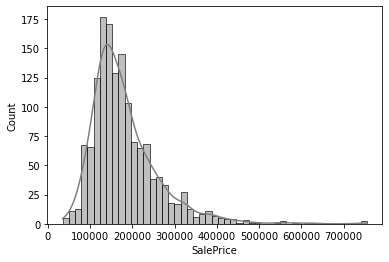

In [51]:
sns.histplot(data = data_proy["SalePrice"], x = data_proy["SalePrice"], kde=True, color="gray")

##### Variable YearBuilt

<AxesSubplot:xlabel='YearBuilt', ylabel='Count'>

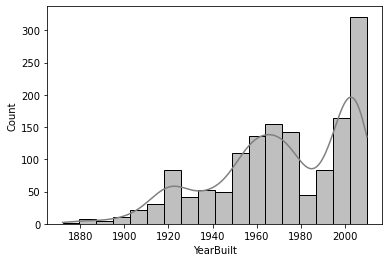

In [52]:
sns.histplot(data = data_proy["YearBuilt"], x = data_proy["YearBuilt"], kde=True, color="gray")

##### Variable OverallQual

<AxesSubplot:xlabel='OverallQual', ylabel='Count'>

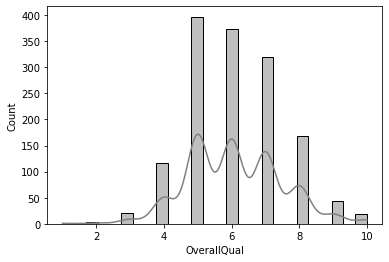

In [53]:
sns.histplot(data = data_proy["OverallQual"], x = data_proy["OverallQual"], kde=True, color="gray")

##### Variable FlrSF1st

<AxesSubplot:xlabel='FlrSF1st', ylabel='Count'>

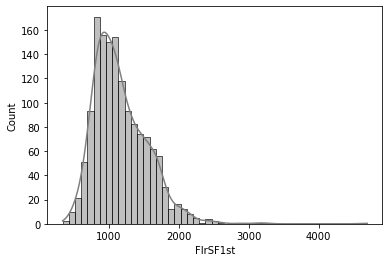

In [54]:
sns.histplot(data = data_proy["FlrSF1st"], x = data_proy["FlrSF1st"], kde=True, color="gray")

##### Variable TotRmsAbvGrd

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='Count'>

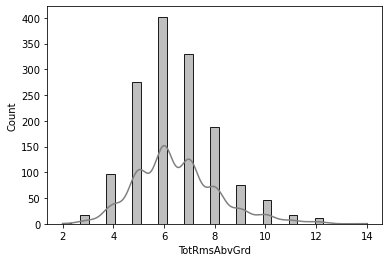

In [55]:
sns.histplot(data = data_proy["TotRmsAbvGrd"], x = data_proy["TotRmsAbvGrd"], kde=True, color="gray")

##### Variable LotFrontage

<AxesSubplot:xlabel='LotFrontage', ylabel='Count'>

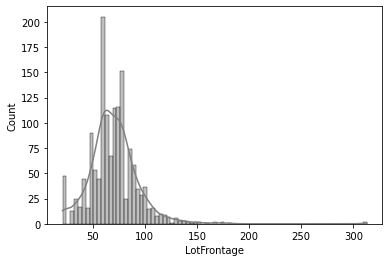

In [56]:
sns.histplot(data = data_proy["LotFrontage"], x = data_proy["LotFrontage"], kde=True, color="gray")

#### Inciso No.5 Analisis de Correlacion  
Para cada variable independiente X :

1) Calcular el coeficiente de correlacion entre X y Y,  
2) Graficar X vs Y (scatterplot) usando matplotlib,  
3) Colocar el coeficiente de correlacion y colocarlo como parte del tıtulo de la grafica,  
4) Basado en la grafica y el coeficiente de correlacion de cada par X ,Y elegir las 2 variables con mas potencial predictivo.
Es decir las 2 variables que presentan mayor correlacionentre dicha variable y la variable dependiente.

In [57]:
#sns.pairplot(data_proy)

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

##### Coeficiente de Correlacion de la Data

In [59]:
data_proy.head()

,SalePrice,YearBuilt,OverallQual,FlrSF1st,TotRmsAbvGrd,LotFrontage
0,208500.0,2003.0,7.0,856.0,8.0,65.0
1,181500.0,1976.0,6.0,1262.0,6.0,80.0
2,223500.0,2001.0,7.0,920.0,6.0,68.0
3,140000.0,1915.0,7.0,961.0,7.0,60.0
4,250000.0,2000.0,8.0,1145.0,9.0,84.0


In [60]:
from scipy.stats.stats import pearsonr
data_proy.corr()

,SalePrice,YearBuilt,OverallQual,FlrSF1st,TotRmsAbvGrd,LotFrontage
SalePrice,1.000000,0.522897,0.790982,0.605852,0.533723,0.298490
YearBuilt,0.522897,1.000000,0.572323,0.281986,0.095589,0.107828
OverallQual,0.790982,0.572323,1.000000,0.476224,0.427452,0.215195
FlrSF1st,0.605852,0.281986,0.476224,1.000000,0.409516,0.373312
TotRmsAbvGrd,0.533723,0.095589,0.427452,0.409516,1.000000,0.294840
LotFrontage,0.298490,0.107828,0.215195,0.373312,0.294840,1.000000


In [61]:
#sns.pairplot(data_proy)

##### Calcular el coeficiente de correlacion entre X y Y
Para este ejercicio se definio:  
Y = SalePrice  
X = YearBuilt	OverallQual	FlrSF1st	TotRmsAbvGrd	LotFrontage

In [62]:
print('YearBuilt: ', data_proy['SalePrice'].corr(data_proy['YearBuilt'], method='pearson'))
print('OverallQual: ', data_proy['SalePrice'].corr(data_proy['OverallQual'], method='pearson'))
print('FlrSF1st: ', data_proy['SalePrice'].corr(data_proy['FlrSF1st'], method='pearson'))
print('TotRmsAbvGrd: ', data_proy['SalePrice'].corr(data_proy['TotRmsAbvGrd'], method='pearson'))
print('LotFrontage: ', data_proy['SalePrice'].corr(data_proy['LotFrontage'], method='pearson'))

YearBuilt:  0.5228973328794969
OverallQual:  0.7909816005838048
FlrSF1st:  0.6058521846919147
TotRmsAbvGrd:  0.5337231555820284
LotFrontage:  0.29849044636085004


##### Coeficiente de Correlacion con data de Entrenamiento

In [38]:
#Base de datos
#dataTrain
#dataTest
#dataTrain_SaleP
#dataTest_SaleP

In [64]:
print('YearBuilt:', np.corrcoef(dataTrain_SaleP[:,0], dataTrain[:,0])[1,0])
print('OverallQual:', np.corrcoef(dataTrain_SaleP[:,0], dataTrain[:,1])[1,0])
print('FlrSF1st:', np.corrcoef(dataTrain_SaleP[:,0], dataTrain[:,2])[1,0])
print('TotRmsAbvGrd:', np.corrcoef(dataTrain_SaleP[:,0], dataTrain[:,3])[1,0])
print('LotFrontage:', np.corrcoef(dataTrain_SaleP[:,0], dataTrain[:,4])[1,0])

YearBuilt: 0.5244519611589445
OverallQual: 0.7889930770922915
FlrSF1st: 0.6199854402815616
TotRmsAbvGrd: 0.5200514299015461
LotFrontage: 0.3177171842667397


##### Coeficiente de Correlacion con data Test

In [37]:
print('YearBuilt:', np.corrcoef(dataTest_SaleP[:,0], dataTest[:,0])[1,0])
print('OverallQual:', np.corrcoef(dataTest_SaleP[:,0], dataTest[:,1])[1,0])
print('FlrSF1st:', np.corrcoef(dataTest_SaleP[:,0], dataTest[:,2])[1,0])
print('TotRmsAbvGrd:', np.corrcoef(dataTest_SaleP[:,0], dataTest[:,3])[1,0])
print('LotFrontage:', np.corrcoef(dataTest_SaleP[:,0], dataTest[:,4])[1,0])

YearBuilt: 0.5166720077323391
OverallQual: 0.8008044334326888
FlrSF1st: 0.5465776680240583
TotRmsAbvGrd: 0.5957340883181725
LotFrontage: 0.24151068970379527


##### Graficar X vs Y (scatterplot)

In [65]:
coef1 = np.corrcoef(dataTrain_SaleP[:,0], dataTrain[:,0])[1,0]
coef2 = np.corrcoef(dataTrain_SaleP[:,0], dataTrain[:,1])[1,0]
coef3 = np.corrcoef(dataTrain_SaleP[:,0], dataTrain[:,2])[1,0]
coef4 = np.corrcoef(dataTrain_SaleP[:,0], dataTrain[:,3])[1,0]
coef5 = np.corrcoef(dataTrain_SaleP[:,0], dataTrain[:,4])[1,0]

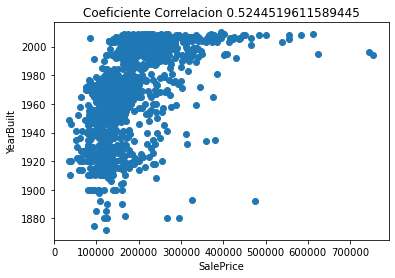

In [66]:
plt.scatter(data_proy['SalePrice'], data_proy['YearBuilt'])
plt.title(f"Coeficiente Correlacion {coef1}")
plt.xlabel('SalePrice')
plt.ylabel('YearBuilt')
plt.show()

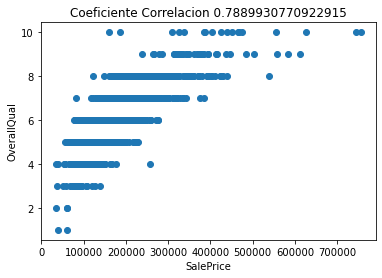

In [67]:
plt.scatter(data_proy['SalePrice'], data_proy['OverallQual'])
plt.title(f"Coeficiente Correlacion {coef2}")
plt.xlabel('SalePrice')
plt.ylabel('OverallQual')
plt.show()

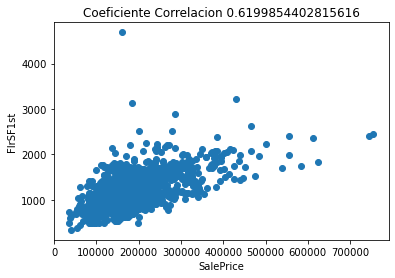

In [68]:
plt.scatter(data_proy['SalePrice'], data_proy['FlrSF1st'])
plt.title(f"Coeficiente Correlacion {coef3}")
plt.xlabel('SalePrice')
plt.ylabel('FlrSF1st')
plt.show()

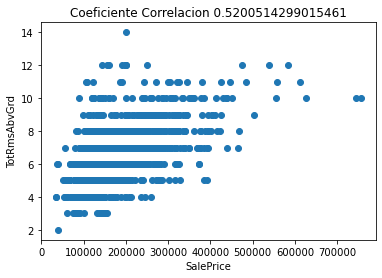

In [69]:
plt.scatter(data_proy['SalePrice'], data_proy['TotRmsAbvGrd'])
plt.title(f"Coeficiente Correlacion {coef4}")
plt.xlabel('SalePrice')
plt.ylabel('TotRmsAbvGrd')
plt.show()

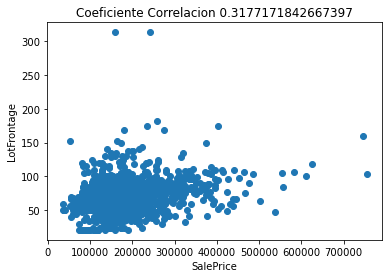

In [70]:
plt.scatter(data_proy['SalePrice'], data_proy['LotFrontage'])
plt.title(f"Coeficiente Correlacion {coef5}")
plt.xlabel('SalePrice')
plt.ylabel('LotFrontage')
plt.show()

##### Conclusion

Basado en el analisis exploratorio de datos realizados, y tomando como referencia el coeficiente de correlacion y el comportamiento de cada una de las variables a través de sus graficas.  

Se pueden considerar las variables calidad de materiales y acabados, y los pies cuadrados del primer piso, como las variables con mayor potencial para realizar los mejores pronosticos en relacion al precio de venta de la propiedad en dolares.

Asimismo, se realizo el calculo de la correlacion con el dataTrain y se observo que las mismas variables muestra la mayor correlacion en relaciona al precio de venta, que las demas.  

Es importante mencionar que al realizar los calculos de las correlaciones, las variables muestran una mayor correlacion con la data total, con relacion a la dataTrain


##### Regresion Lineal Multiple

In [71]:
YM = data_proy['SalePrice'].values.reshape(-1, 1)
XM = data_proy.iloc[:, 1:6].values.reshape(-1, 5)

dataTrain, dataTest, dataTrain_SaleP, dataTest_SaleP = train_test_split(XM, YM, test_size = 0.2, shuffle=True, random_state=123)

lmm = LinearRegression()
lmm.fit(XM, YM)
lmm.coef_
lmm.intercept_
print('R2:', lmm.score(dataTrain, dataTrain_SaleP))

R2: 0.7279345706773444


##### Regresion Lineal Simple

##### X1 = YearBuilt

In [39]:
X1 = dataTrain[:, np.newaxis, 0]
X1t = dataTest[:, np.newaxis, 0]
Y0 = dataTrain_SaleP

lm1 = LinearRegression()
lm1.fit(X1, Y0)
Y1 = lm1.predict(X1t)

print('B1:', lm1.coef_)
print('B0:', lm1.intercept_)
print('R2:', lm1.score(X1t, dataTest_SaleP))

mse = metrics.mean_squared_error(dataTest_SaleP, Y1)
print("Mean Squared Error {}".format(mse))
#print("Predicciones {}".format(Y1[:5]))
#print("Valores Reales {}".format(dataTest_SaleP[:5]))


B1: [[1374.17806927]]
B0: [-2527649.07554854]
R2: 0.26656816000756756
Mean Squared Error 4532326388.98649


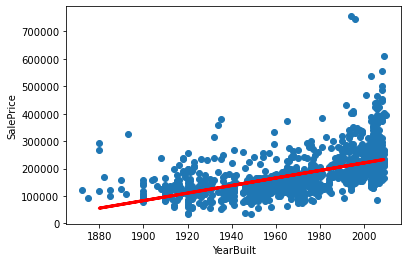

In [73]:
plt.scatter(X1, Y0)
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.plot(X1t, Y1, color='red', linewidth=3)

##### X2 = OverallQual

In [40]:
X2 = dataTrain[:, np.newaxis, 1]
X2t =  dataTest[:, np.newaxis, 1]
Y0 = dataTrain_SaleP
lm2 = LinearRegression()
lm2.fit(X2, Y0)
Y2 = lm2.predict(X2t)

print('B1:', lm2.coef_)
print('B0:', lm2.intercept_)
print('R2:', lm2.score(X2t, dataTest_SaleP))

mse = metrics.mean_squared_error(dataTest_SaleP, Y2)
print("Mean Squared Error {}".format(mse))
#print("Predicciones {}".format(Y2[:5]))
#print("Valores Reales {}".format(dataTest_SaleP[:5]))


B1: [[44813.4594101]]
B0: [-92345.76508706]
R2: 0.6378891970225264
Mean Squared Error 2237705344.3559594


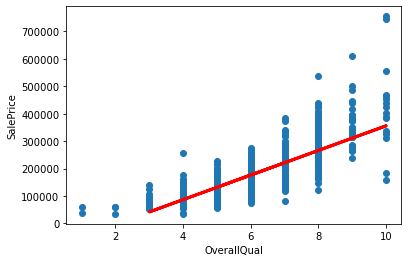

In [75]:
plt.scatter(X2, Y0)
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.plot(X2t, Y2, color='red', linewidth=3)

##### X3 = FlrSF1st

In [41]:
X3 = dataTrain[:, np.newaxis, 2]
X3t = dataTest[:, np.newaxis, 2]
Y0 = dataTrain_SaleP
lm3 = LinearRegression()
lm3.fit(X3, Y0)
Y3 = lm3.predict(X3t)

print('B1:', lm3.coef_)
print('B0:', lm3.intercept_)
print('R2:', lm3.score(X3t, dataTest_SaleP))

mse = metrics.mean_squared_error(dataTest_SaleP, Y3)
print("Mean Squared Error {}".format(mse))
#print("Predicciones {}".format(Y3[:5]))
#print("Valores Reales {}".format(dataTest_SaleP[:5]))

B1: [[124.63473898]]
B0: [35077.7487892]
R2: 0.2951740790681032
Mean Squared Error 4355552822.896674


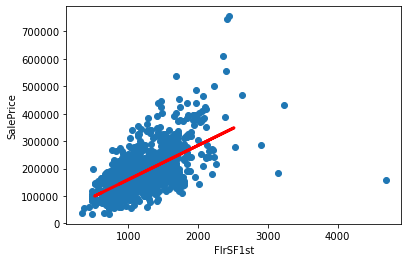

In [42]:
plt.scatter(X3, Y0)
plt.xlabel('FlrSF1st')
plt.ylabel('SalePrice')
plt.plot(X3t, Y3, color='red', linewidth=3)

##### X4 = TotRmsAbvGrd

In [43]:
X4 = dataTrain[:, np.newaxis, 3]
X4t = dataTest[:, np.newaxis, 3]
Y0 = dataTrain_SaleP
lm4 = LinearRegression()
lm4.fit(X4, Y0)
Y4 = lm4.predict(X4t)

print('B1:', lm4.coef_)
print('B0:', lm4.intercept_)
print('R2:', lm4.score(X4t, dataTest_SaleP))

mse = metrics.mean_squared_error(dataTest_SaleP, Y4)
print("Mean Squared Error {}".format(mse))
#print("Predicciones {}".format(Y4[:5]))
#print("Valores Reales {}".format(dataTest_SaleP[:5]))

B1: [[25155.38306682]]
B0: [16194.83369227]
R2: 0.34154368862672024
Mean Squared Error 4069006488.8137574


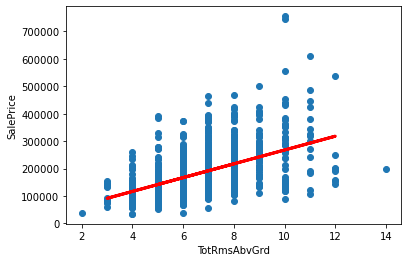

In [79]:
plt.scatter(X4, Y0)
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('SalePrice')
plt.plot(X4t, Y4, color='red', linewidth=3)

##### X5 = LotFrontage

In [44]:
X5 = dataTrain[:, np.newaxis, 4]
X5t = dataTest[:, np.newaxis, 4]
Y0 = dataTrain_SaleP
lm5 = LinearRegression()
lm5.fit(X5, Y0)
Y5 = lm5.predict(X5t)

print('B1:', lm5.coef_)
print('B0:', lm5.intercept_)
print('R2:', lm5.score(X5t, dataTest_SaleP))

mse = metrics.mean_squared_error(dataTest_SaleP, Y5)
print("Mean Squared Error {}".format(mse))
#print("Predicciones {}".format(Y5[:5]))
#print("Valores Reales {}".format(dataTest_SaleP[:5]))

B1: [[1115.95485882]]
B0: [103226.99839941]
R2: 0.033333091064838394
Mean Squared Error 5973629316.082104


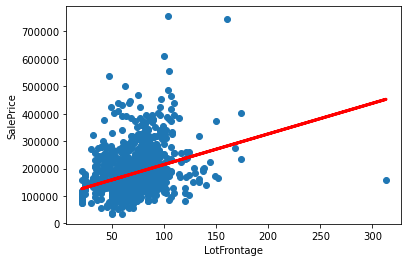

In [81]:
plt.scatter(X5, Y0)
plt.xlabel('LotFrontage')
plt.ylabel('SalePrice')
plt.plot(X5t, Y5, color='red', linewidth=3)

#### Inciso No.6 Crear Funcion  
Crear una funcion para entrenar un modelo de regresion lineal de una variable y = β0 +β1 ∗x.

Nota: numpy.newaxis se usa para aumentar la dimensión de la matriz existente en una dimensión más, cuando se usa una vez. 

##### Librerias

In [13]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

In [14]:
data_proy = np.load('proyecto_training_data.npy')
data_proy = pd.DataFrame(data_proy, columns=['SalePrice', 'OverallQual', 'FlrSF1st', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])
x = data_proy['FlrSF1st'].values
y = data_proy['SalePrice'].values

##### Regresion Lineal para FlrSF1st

In [15]:
import sklearn
#vx = data_proy['FlrSF1st']
vx = data_proy['OverallQual']
vy = data_proy['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(vx.values.reshape(-1,1), vy.values.reshape(-1,1), train_size=0.8, 
                                                    random_state = 123, shuffle = True)

lm = LinearRegression()
lm.fit(X_train, y_train)
Y_pred = lm.predict(X_test)

print('B0:', lm.intercept_)
print('B1:', lm.coef_)
print('Coef_Corr: ', data_proy['SalePrice'].corr(data_proy['OverallQual'], method='pearson'))
print('MSE:', sklearn.metrics.mean_squared_error(y_test, Y_pred))

B0: [-92345.76508706]
B1: [[44813.4594101]]
Coef_Corr:  0.7909816005838048
MSE: 2237705344.3559594


Text(0, 0.5, 'SalePrice')

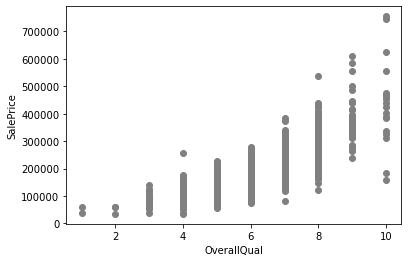

In [85]:
# Visualizacion de la Data, datos normales
plt.scatter(vx, vy, color='gray')
#plt.xlabel("FlrSF1st")
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")

Text(0.5, 1.0, 'SalePrice vs OverallQua')

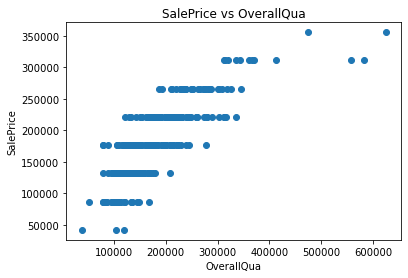

In [86]:
# Visualizacion del modelo estimado
plt.scatter(y_test, Y_pred)
#plt.xlabel("FlrSF1st")
plt.xlabel("OverallQua")
plt.ylabel("SalePrice")
plt.title("SalePrice vs OverallQua")

##### Funciones

In [87]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

In [88]:
data_proy = np.load('proyecto_training_data.npy')
data_proy = pd.DataFrame(data_proy, columns=['SalePrice', 'OverallQual', 'FlrSF1st', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])
#X = data_proy['FlrSF1st'].values.reshape(-1, 1)
X = data_proy['OverallQual'].values.reshape(-1, 1)
y = data_proy['SalePrice'].values.reshape(-1, 1)

In [89]:
n = len(X)

In [90]:
#X = data_proy['FlrSF1st'].values.reshape(-1, 1)
X = data_proy['OverallQual'].values.reshape(-1, 1)
y = data_proy['SalePrice'].values.reshape(-1, 1)

In [91]:
X

array([[7.],
       [6.],
       [7.],
       ...,
       [7.],
       [5.],
       [5.]])

In [92]:
y

array([[208500.],
       [181500.],
       [223500.],
       ...,
       [266500.],
       [142125.],
       [147500.]])

Text(0, 0.5, 'Y')

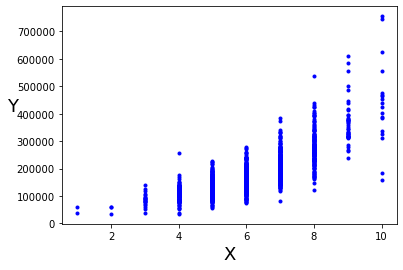

In [93]:
plt.plot(X , y,'b.')
plt.xlabel("X", fontsize= 18)
plt.ylabel("Y", rotation= 0, fontsize= 18)
#_ =plt.axis([0,6000,0,500000])

In [94]:
X2 = np.c_[np.ones((n,1)), X]
theta_best = np.linalg.inv(X2.T.dot(X2)).dot(X2.T).dot(y)
print('theta0:', theta_best[0])
print('theta1:', theta_best[1])

theta0: [-96206.07951476]
theta1: [45435.8025931]


##### Calcular y_hat (Prediccion o Estimadacion)  
y_predict = np.dot(observacion, parametro)

In [100]:
X_new = np.array([[0],[2]])
X2_new = np.c_[np.ones((2,1)), X_new]
y_predict = X2_new.dot(theta_best)

Text(0, 0.5, 'Y')

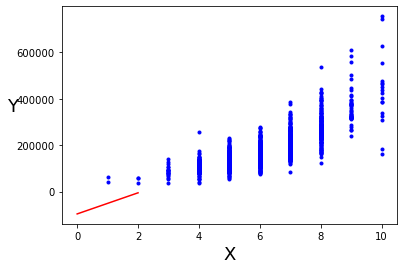

In [101]:
plt.plot(X_new, y_predict,'r-')
plt.plot(X, y, 'b.')
plt.xlabel("X", fontsize=18)
plt.ylabel("Y", rotation=0, fontsize=18)
#plt.axis([0,5000,0,300000])

##### Calcular el error o costo usando

In [102]:
def  cal_cost(theta, X, y):
    n = len(y)
    predict = X.dot(theta)
    cost = (1/2*n) * np.sum(np.square(predict - y))
    return cost

##### Calcular el gradiente del error respecto de cada parametro

In [103]:
def gradient_descent(X, y, theta, alpha=0.01, iterar= 100):
    n = len(y)
    cost_history = np.zeros(iterar)
    theta_history = np.zeros((iterar, 2))
    for it in range(iterar):
        
        predict = np.dot(X, theta)
        
        theta = theta -(1/n)*alpha*( X.T.dot((predict - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,X,y)
        
    return theta, cost_history, theta_history

##### Parametros

In [104]:
alpha =0.001
iterar = 10000

theta = np.random.randn(2,1)

X2 = np.c_[np.ones((len(X),1)), X]
theta, cost_history, theta_history = gradient_descent(X2, y, theta, alpha, iterar)

print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0], theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          -33624.085,
Theta1:          35664.798
Final cost/MSE:  2720274598600905.500


##### Visualizacion

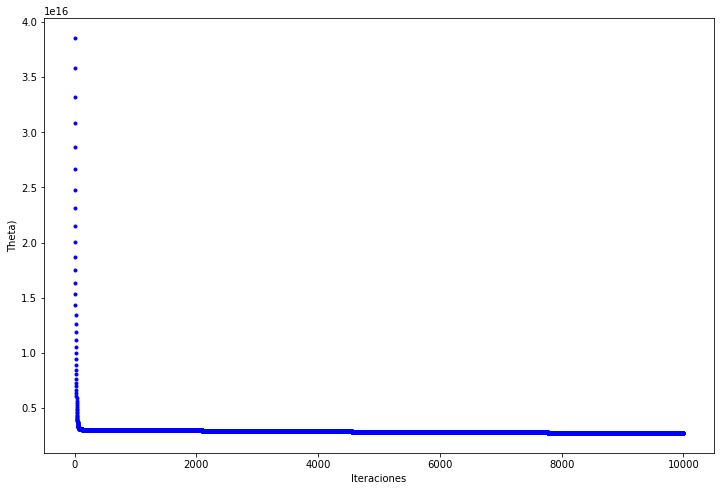

In [105]:
fig,ax = plt.subplots(figsize=(12,8))
ax.set_ylabel('Theta)')
ax.set_xlabel('Iteraciones')
_=ax.plot(range(iterar), cost_history,'b.')

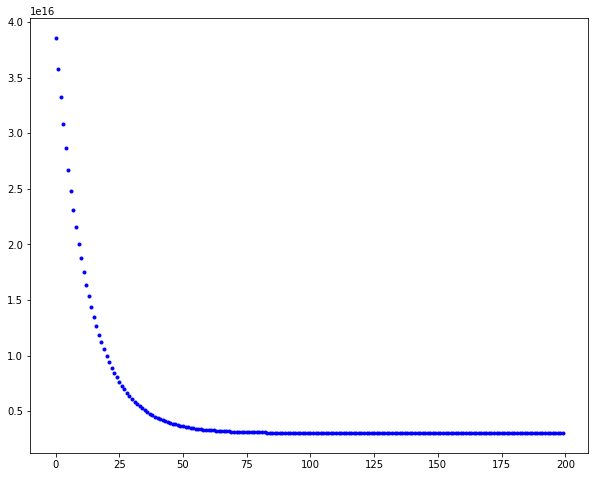

In [367]:
fig,ax = plt.subplots(figsize=(10,8))
_=ax.plot(range(200),cost_history[:200],'b.')

#### PRUEBAS CON LA DATA

In [16]:
# Data para la estimacion
X = data_proy['FlrSF1st'].values.reshape(-1, 1)
y = data_proy['SalePrice'].values.reshape(-1, 1)

In [17]:
# los mejores estimadores para theta
X2 = np.c_[np.ones((1460,1)), X]
theta_estimados = np.linalg.inv(X2.T.dot(X2)).dot(X2.T).dot(y)
print('Theta0:', theta_estimados[0])
print('Theta1:', theta_estimados[1])

Theta0: [36173.44679512]
Theta1: [124.50062222]


In [18]:
#derivadas parciales: direccion de la pendiente
#vector de las derivadas parciales = gradiente
#minimizar el corte del modelo = theta - alpha(f.gradiente)

In [19]:
# Parametros iniciales  
alpha =0.05 #tasa de aprendizaje
A = 0.1 #theta0
B = 0.1 #theta1
iteraciones = 100

In [6]:
def y_hat(x, A, B):
    return A + B*X

In [7]:
def plot_line(X, y, A, B):
    x_ = [i for i in range(int(min(X))-1, int(max(X))+2)]
    y_ = [y_hat(X, A, B) for X in x_]
    plt.plot(x_, y_, 'r')
    plt.plot(X, y, 'b0')
    
#plot_line(X, y, A, B)

In [8]:
def MSE(X, y, A, B):
    costo = 0
    n = float(len(X))
    for i in range(0, len(X)):
        costo += (y_hat(X[i], A, B) - y[i])**2
        
    return costo/n

In [9]:
def gradDesc_Step(A, B, X, y, alpha):
    err_A = 0
    err_B = 0
    n = float(len(X))
    
    for i in range(0, len(X)):
        err_A += y_hat(X[i], A, B) - y[i]
        err_B += (y_hat(X[i], A, B) - y[i]) * X[i]
        
        Anew = A - alpha *(1/n)*err_A
        Bnew = B - alpha *(1/n)*err_B
        return Anew, Bnew    

In [12]:
#A, B = gradDesc_Step(A, B, X, y, alpha)

In [11]:
epoch = 1000

In [309]:
def gradDesc(A, B, X, y, alpha, epoch):
    costo = np.zeros(epoch)
    for i in range(epoch):
        A, B = gradDesc_Step(A, B, X, y, alpha)
        costo[i] = MSE(X, y, A, B)
    return A, B, costo 

In [310]:
#A, B, costo = gradDesc(A, B, X, y, alpha, epoch)

In [313]:
#fig, ax = plt.subplots()
#ax.plot(np.arange(epoch), costo, 'r')
#ax.set_xlable('Iteraciones')
#ax.set_ylabel('Costo')
#ax.set_title('MSE vrs Epoch')